In [180]:
import pandas as pd
import numpy as np

In [181]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [182]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [183]:
df.shape

(5572, 5)

## 1.DATA CLEANING ##

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [185]:
df["Unnamed: 3"].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [186]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [187]:
df.shape

(5572, 2)

In [188]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [189]:
from sklearn.preprocessing import LabelEncoder

In [190]:
le=LabelEncoder()

In [191]:
df["target"]=le.fit_transform(df["target"])

In [192]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [193]:
df.duplicated().sum()

np.int64(403)

In [194]:
df=df.drop_duplicates(keep="first")

# so we are donw with the basic cleaning part... #

## 2.EDA ##

In [195]:
a=df["target"].value_counts()

In [196]:
print("ham parcentage is: " ,f"{(a[0]/(a[0]+a[1]))*100:0.2f}%")
print("spam parcentage is: " ,f"{(a[1]/(a[0]+a[1]))*100:0.2f}%")


ham parcentage is:  87.37%
spam parcentage is:  12.63%


In [197]:
import matplotlib.pyplot as plt

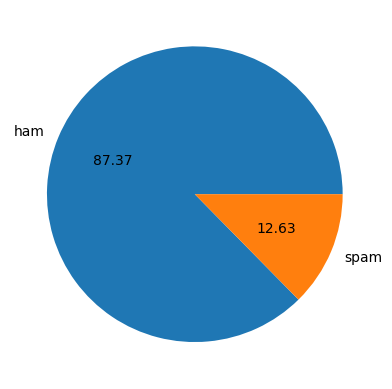

In [198]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

**Data is imbalance**

In [199]:
import nltk

In [200]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [201]:
#no. of characters
df["num_characters"]=df["text"].apply(len)

In [202]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [203]:
#no. of words

from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")

df["num_words"]=df["text"].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tanmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [204]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [205]:
from nltk.tokenize import sent_tokenize
df["num_sentences"]=df["text"].apply(lambda x: len(sent_tokenize(x)))

In [206]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [207]:
df[["num_characters","num_sentences","num_words"]].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [208]:
df[["num_characters","num_words","num_sentences"]] 

,num_characters,num_words,num_sentences
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [209]:
#ham massages
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [210]:
#spam massages
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [211]:
import seaborn as sns

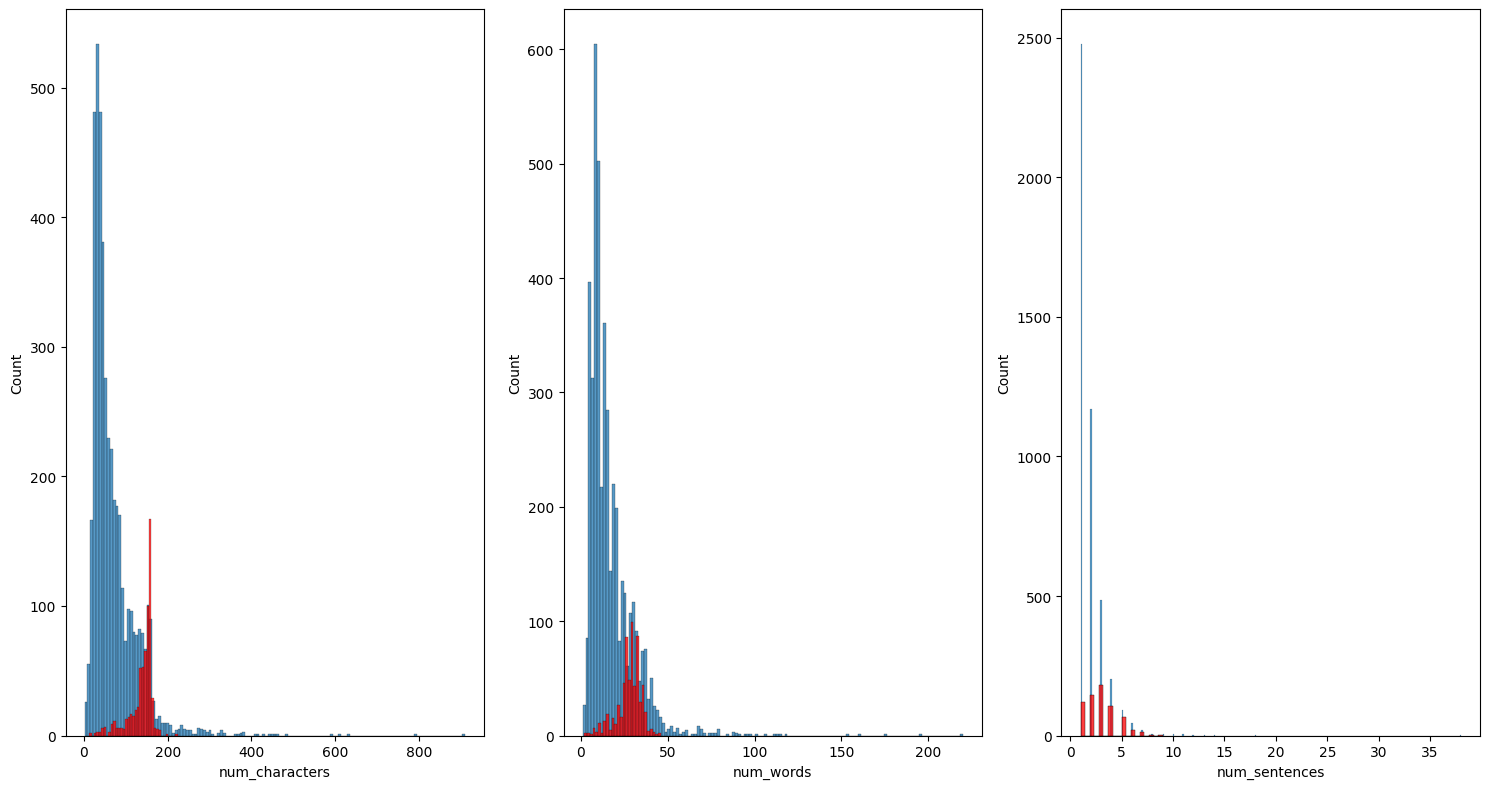

In [212]:
l=["num_characters","num_words","num_sentences"]
n_cols=3
n_rows=1
fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,8))

for ax,el in zip(axes,l):
    sns.histplot( df[df["target"]==0][el],ax=ax)
    sns.histplot( df[df["target"]==1][el],color="red",ax=ax)


plt.tight_layout()
plt.show()





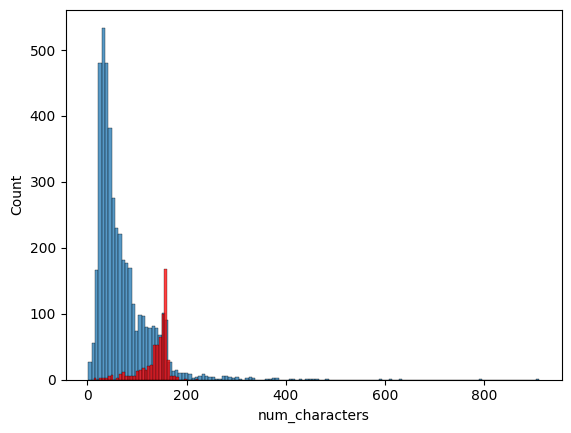

In [213]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")
plt.show()

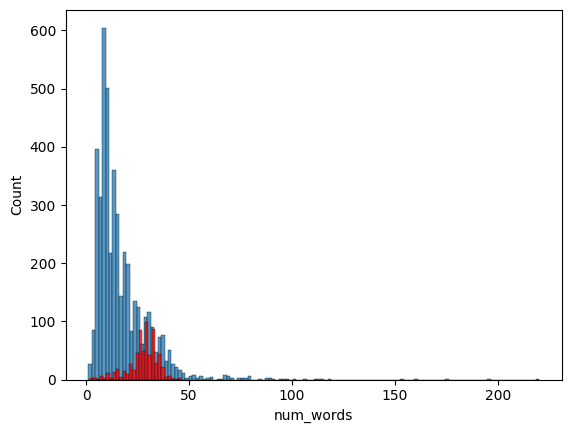

In [214]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")
plt.show()

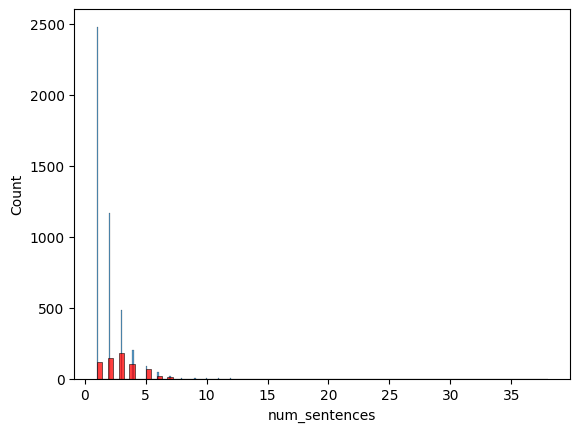

In [215]:
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color="red")
plt.show()

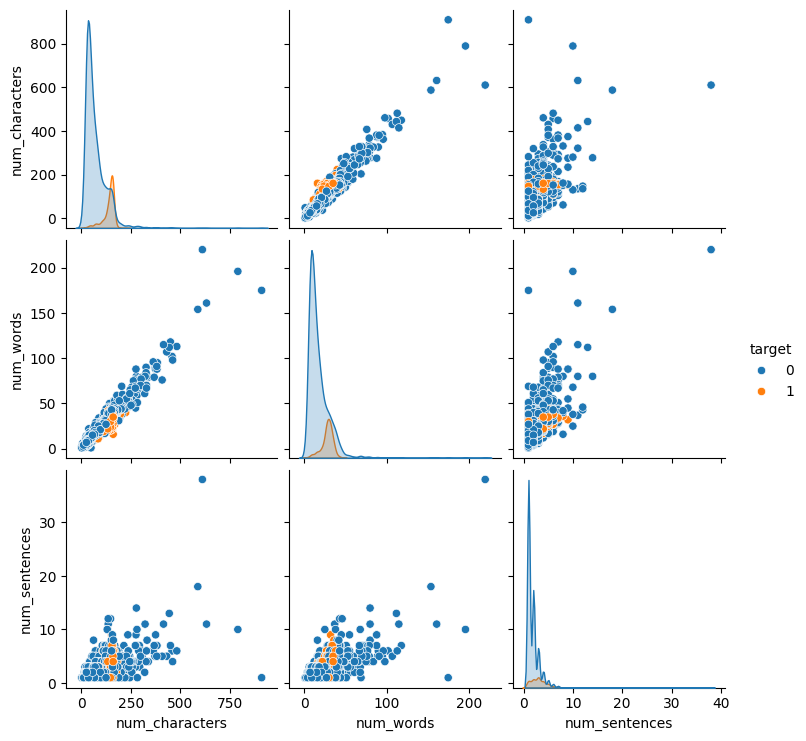

In [216]:
sns.pairplot(df,hue="target")
plt.show()

<Axes: >

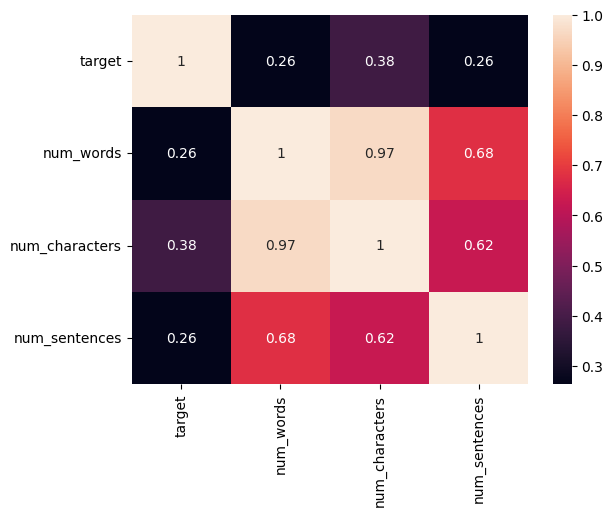

In [217]:
sns.heatmap(df[["target", "num_words", "num_characters", "num_sentences"]].corr(),annot=True)


## DATA PREPROCESSING ##

In [218]:
# def transform_text(text:str):
#     text=text.lower()
#     text=word_tokenize(text)
#     y=[]
#     for el in text:
#         if el.isalnum():
#             y.append(el)

#     return y

In [219]:
# transform_text("Hi *+-*[]-i9hnm How are you")

In [220]:
from nltk.corpus import stopwords

In [221]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [222]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [223]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("lovely")

'love'

In [224]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [225]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for el in text:
        if el.isalnum():
            y.append(el)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation: 
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [226]:
transform_text("Hi *+-*[]-i9hnm How are you doing bichi killed  lovely beautifully")

'hi bichi kill love beauti'

In [227]:
transform_text("I loveed the yt lectures of Machine Learning. How about you?")

'love yt lectur machin learn'

In [228]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [229]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [230]:
df["trans_text"]=df["text"].apply(transform_text)

In [231]:
df.head()

,target,text,num_characters,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [232]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")


In [233]:
spam_wc=wc.generate(df[df["target"]==1]["trans_text"].str.cat(sep=" "))

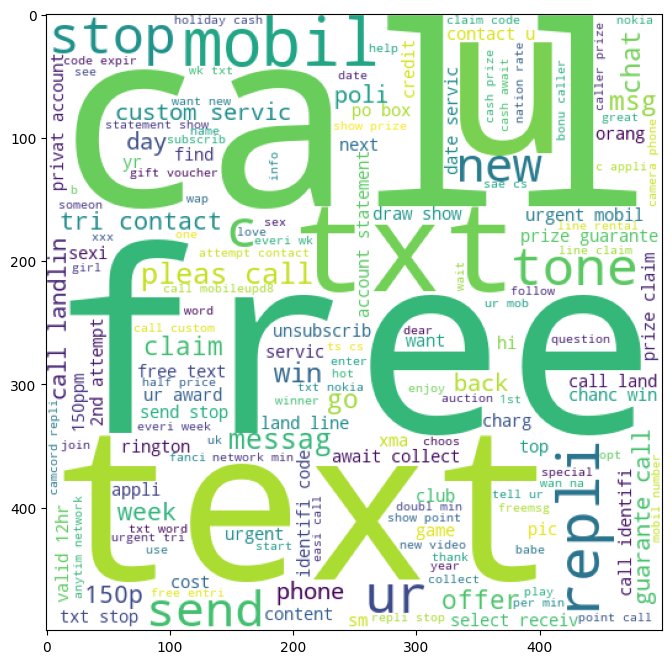

In [234]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [235]:
ham_wc=wc.generate(df[df["target"]==0]["trans_text"].str.cat(sep=" "))

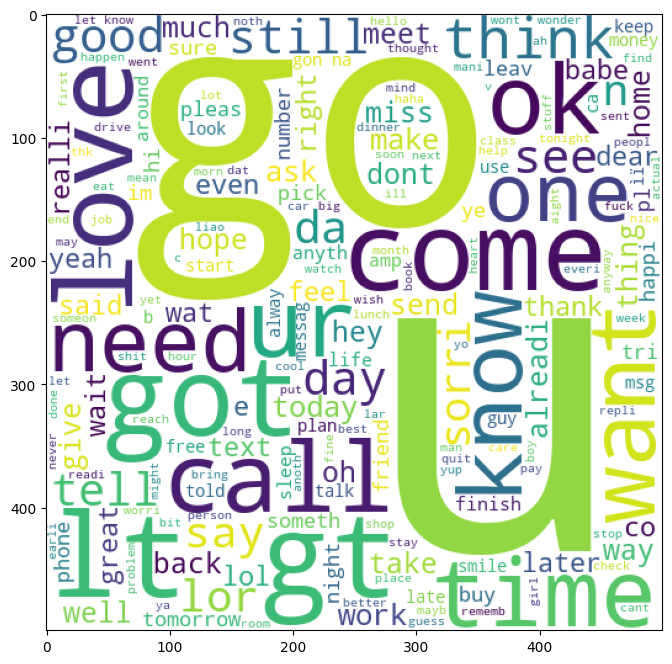

In [236]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [237]:
df.head()

,target,text,num_characters,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [238]:
spam_corpus=[]
for msg in df[df["target"]==1]["trans_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [239]:
len(spam_corpus)

9939

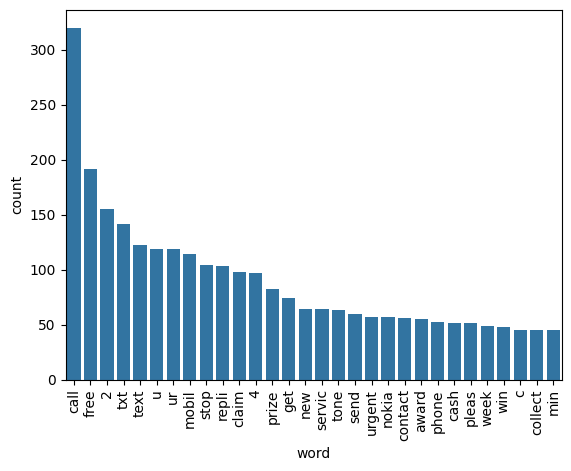

In [240]:
from collections import Counter 
df_common = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=["word", "count"]
)

sns.barplot(x="word", y="count", data=df_common)
plt.xticks(rotation=90)
plt.show()

In [241]:
ham_corpus=[]
for msg in df[df["target"]==0]["trans_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [242]:
len(ham_corpus)

35404

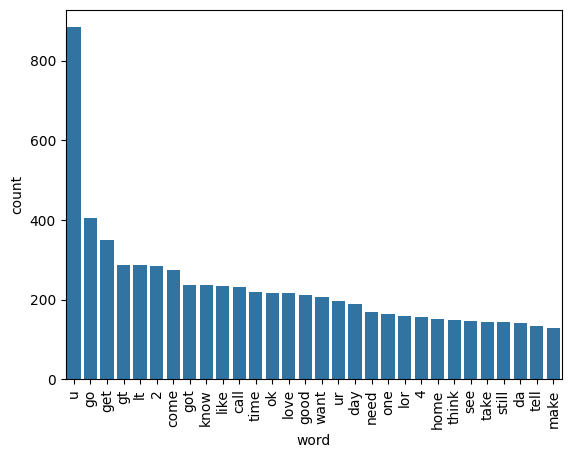

In [243]:
from collections import Counter
df_common1 = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=["word", "count"]
)

sns.barplot(x="word", y="count", data=df_common1)
plt.xticks(rotation=90)
plt.show()

## 4.Model Building ##

In [244]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer()

In [245]:
x=cv.fit_transform(df["trans_text"]).toarray()


In [246]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [247]:
y=df["target"].values

In [248]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [251]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [252]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [253]:
gnb.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [254]:
y_pred1=gnb.predict(x_test)

In [255]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [256]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [257]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [259]:
x=tfidf.fit_transform(df["trans_text"]).toarray()

In [260]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

In [261]:
y=df["target"].values

In [262]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)

In [263]:
bnb.fit(x_train1,y_train1)
y_pred3=bnb.predict(x_test1)
print(accuracy_score(y_test1, y_pred3))
print(confusion_matrix(y_test1,y_pred3))
print(precision_score(y_test1,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [265]:
mnb.fit(x_train1,y_train1)
y_pred2=mnb.predict(x_test1)
print(accuracy_score(y_test1,y_pred2))
print(confusion_matrix(y_test1,y_pred2))
print(precision_score(y_test1,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


**  Since precision score matters in this project, that is false positive, so we will go with multinomial naive bayes since only one false positive  ** so finally we choose tfidf -> mnb

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
